In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# enable interactive plots
%matplotlib widget

# formatting
import fig_specs as fsp
plt.rcParams['figure.figsize'] = (10, 6) # set default figure size
plt.rcParams['font.family'] = 'sans-serif' # set default font family
plt.rcParams['font.sans-serif'] = 'Helvetica' # set default font
plt.rcParams['font.size'] = 14 # set default font size
plt.rcParams['savefig.bbox'] = 'tight'

# Import and concatenate all 4D results data into suitable dataframes

In [148]:
import os
import pickle

# Set the directory containing the CSV files
csv_dir = './results/4d/results'

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Concatenate all CSV files into a single dataframe
df_sim = pd.concat([pd.read_csv(os.path.join(csv_dir, f)) for f in csv_files])

# Load pickled train time dataframe
with open('./benchmark-policies/4d/wind_0,9_train_time.pkl', 'rb') as f:
    df_train = pickle.load(f)

# Modify df_train
# Create new columns
df_train['grid_size'] = df_train.index.str.extract(r'^(\d{1,2})\d{1}', expand=False).astype(int)
df_train['obstacle_density'] = df_train.index.str.extract(r'^\d{1,2}(\d{1})', expand=False).astype(int)

# define a dictionary to map the old "density" values to new percentage values
mapping = {1: 0, 2: 0.05, 3: 0.10, 4: 0.15}

# replace the old values with the new values
df_train['obstacle_density'] = df_train['obstacle_density'].replace(mapping)



# Modify df_sim
# Create new columns
df_sim['grid_size'] = df_sim['MDP_ID'].astype(str).str.extract(r'^(\d{1,2})\d{1}', expand=False).astype(int)
df_sim['obstacle_density'] = df_sim['MDP_ID'].astype(str).str.extract(r'^\d{1,2}(\d{1})', expand=False).astype(int)

# define a dictionary to map the old "density" values to new percentage values
mapping = {1: 0, 2: 0.05, 3: 0.10, 4: 0.15}

# replace the old values with the new values
df_sim['obstacle_density'] = df_sim['obstacle_density'].replace(mapping)

In [149]:
df_sim.head()

,dimension,MDP_ID,wind_param,sol_method,l1_norm,no_solutions,solver_time,grid_size,obstacle_density
0,4,131,0.8,IP,0.0,5.0,0.610973,13,0.0
1,4,131,0.8,IP,10.0,13.0,1.634126,13,0.0
2,4,131,0.8,IP,4.0,7.0,0.911011,13,0.0
3,4,131,0.8,IP,2.0,7.0,0.919262,13,0.0
4,4,131,0.8,IP,2.0,7.0,0.931227,13,0.0


In [150]:
df_train.head()

,DP4,MC4,grid_size,obstacle_density
"41_wind_0,9",1.767049,0.336776,4,0.00
"42_wind_0,9",1.755515,0.339481,4,0.05
"43_wind_0,9",1.678167,0.310009,4,0.10
"44_wind_0,9",1.589444,0.298224,4,0.15
"51_wind_0,9",4.588190,0.717241,5,0.00


# Plot stuff

## RL training times

### Surface

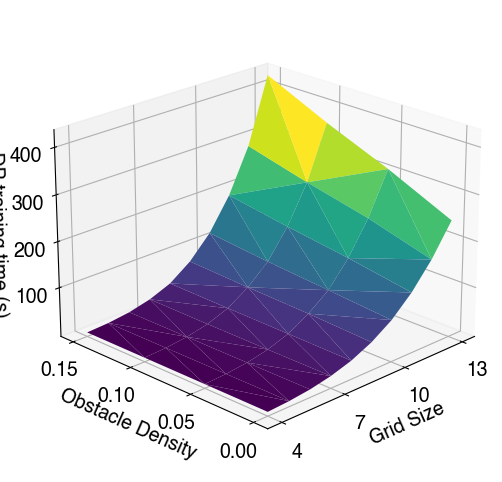

In [151]:
from matplotlib.transforms import Bbox
fig = plt.figure()

method = 'dp'

if method == 'dp':
    ax = fig.add_subplot(projection='3d')
    ax.plot_trisurf(df_train['grid_size'], df_train['obstacle_density'], df_train['DP4'], cmap='viridis')
    ax.set_xlabel('Grid Size')
    ax.set_ylabel('Obstacle Density')
    ax.set_zlabel('DP training time (s)')
elif method == 'mc':
    ax = fig.add_subplot(projection='3d')
    ax.plot_trisurf(df_train['grid_size'], df_train['obstacle_density'], df_train['MC4'], cmap='plasma')
    ax.set_xlabel('Grid size')
    ax.set_ylabel('Obstacle density')
    ax.set_zlabel('MC training time (s)')

ax.set_yticks(np.arange(0, 0.16, 0.05))
ax.set_xticks(np.arange(4, 14, 3))
ax.view_init(elev=22, azim=-135)

plt.show()

### Contour

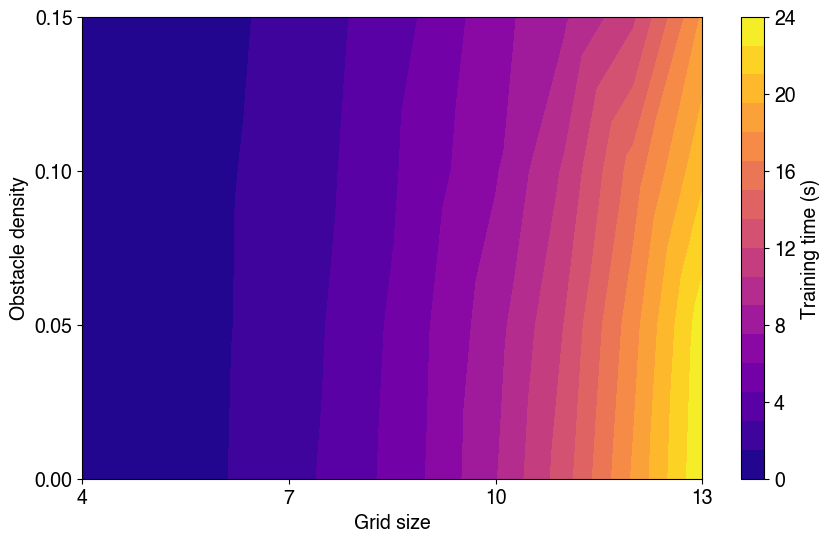

In [152]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.ticker import MaxNLocator

fig = plt.figure()

method = 'mc'

ax = fig.add_subplot()
# Get the x, y, z values
x, y, z_train_mc = df_train['grid_size'], df_train['obstacle_density'], df_train['MC4']
z_train_dp = df_train['DP4']

# Create a triangulation of the irregular grid
triang = tri.Triangulation(x, y)

# Plot the contour
if method == 'mc':
    #levels = np.linspace(0, 1, 17)
    cs = ax.tricontourf(triang, z_train_mc, levels = 18, cmap='plasma')
    cbar = plt.colorbar(cs, ax=ax)
    cbar.locator = MaxNLocator(7) # this number sets maximum number of colour bar ticks
elif method == 'dp':
    #levels = np.linspace(0, 0.5, 11)
    cs = ax.tricontourf(triang, z_train_dp, levels = 18, cmap='viridis')
    cbar = plt.colorbar(cs, ax=ax)
    cbar.locator = MaxNLocator(6) # this number sets maximum number of colour bar ticks

# Set labels for the axes
ax.set_xlabel('Grid size')
ax.set_ylabel('Obstacle density')
cbar.ax.set_ylabel('Training time (s)')
ax.set_yticks(np.arange(0, 0.16, 0.05))
ax.set_xticks(np.arange(4,14,3))
plt.grid(False)

plt.show()

## L1 Norm performance

### Surface (fixed wind parameter)

/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/1654354043.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/1654354043.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/1654354043.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean 

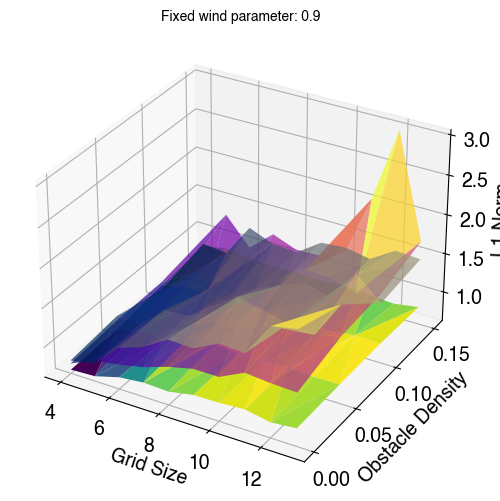

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

df_sim_mc = df_sim[df_sim['sol_method'] == 'MC']
data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
df_sim_dp = df_sim[df_sim['sol_method'] == 'DP']
data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
df_sim_ip = df_sim[df_sim['sol_method'] == 'IP']
data_ip = df_sim_ip.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()

wind_param_vals = [0.9]

for wp in wind_param_vals:
    norm_data_mc = data_mc.loc[:, :, wp]['l1_norm']
    norm_data_dp = data_dp.loc[:, :, wp]['l1_norm']
    norm_data_ip = data_ip.loc[:, :, wp]['l1_norm']

    # Get the x, y, z values
    x = norm_data_mc.index.get_level_values('grid_size')
    y = norm_data_mc.index.get_level_values('obstacle_density')
    z_mc = norm_data_mc.values
    z_dp = norm_data_dp.values
    z_ip = norm_data_ip.values

    # Plot the 3D surfaces
    ax.plot_trisurf(x, y, z_mc, cmap='plasma', alpha = 0.7)
    ax.plot_trisurf(x, y, z_dp, cmap='viridis', alpha = 1)
    ax.plot_trisurf(x, y, z_ip, cmap='cividis', alpha = 0.7)
    
    ax.set_title(f'Fixed wind parameter: {wp}')


# Set labels for the axes
ax.set_xlabel('Grid Size')
ax.set_ylabel('Obstacle Density')
ax.set_zlabel('L1 Norm')
ax.set_yticks(np.arange(0, 0.16, 0.05))

plt.show()


### Contour (fixed wind parameter)

/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/1113524987.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/1113524987.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/1113524987.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean 

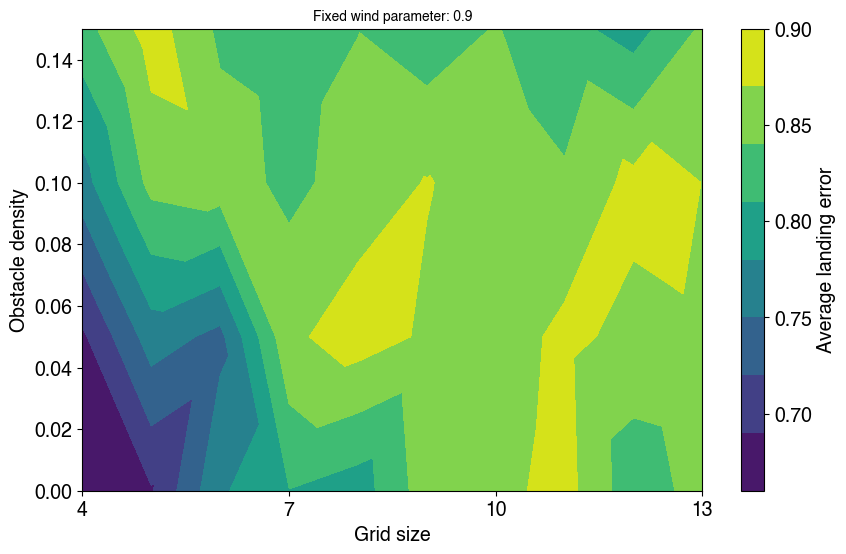

In [154]:
fig, ax = plt.subplots()

df_sim_mc = df_sim[df_sim['sol_method'] == 'MC']
data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
df_sim_dp = df_sim[df_sim['sol_method'] == 'DP']
data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
df_sim_ip = df_sim[df_sim['sol_method'] == 'IP']
data_ip = df_sim_ip.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()


# Input data
wp = 0.9
method = 'dp'

norm_data_mc = data_mc.loc[:, :, wp]['l1_norm']
norm_data_dp = data_dp.loc[:, :, wp]['l1_norm']
norm_data_ip = data_ip.loc[:, :, wp]['l1_norm']

# Get the x, y, z values
x = norm_data_mc.index.get_level_values('grid_size')
y = norm_data_mc.index.get_level_values('obstacle_density')
z_dp = norm_data_dp.values
z_mc = norm_data_mc.values
z_ip = norm_data_ip.values
# Create a triangulation for x and y axes
triang = tri.Triangulation(x, y)
# Create the contour plot
if method == 'dp':
    cntr = ax.tricontourf(triang, z_dp, cmap='viridis')
elif method == 'mc':
    cntr = ax.tricontourf(triang, z_mc, cmap='plasma')
elif method == 'ip':
    cntr = ax.tricontourf(triang, z_ip, cmap='cividis')
# Add a color bar
cbar = plt.colorbar(cntr, ax=ax)
cbar.ax.set_ylabel('Average landing error')
cbar.locator = MaxNLocator(5) # this number sets maximum number of colour bar ticks

# Set labels for the axes
ax.set_xlabel('Grid size')
ax.set_ylabel('Obstacle density')
ax.set_xticks(np.arange(4,14,3))
ax.set_title(f'Fixed wind parameter: {wp}')

plt.show()

### Contour (fixed obstacle density)

/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/2724039145.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/2724039145.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/2724039145.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean 

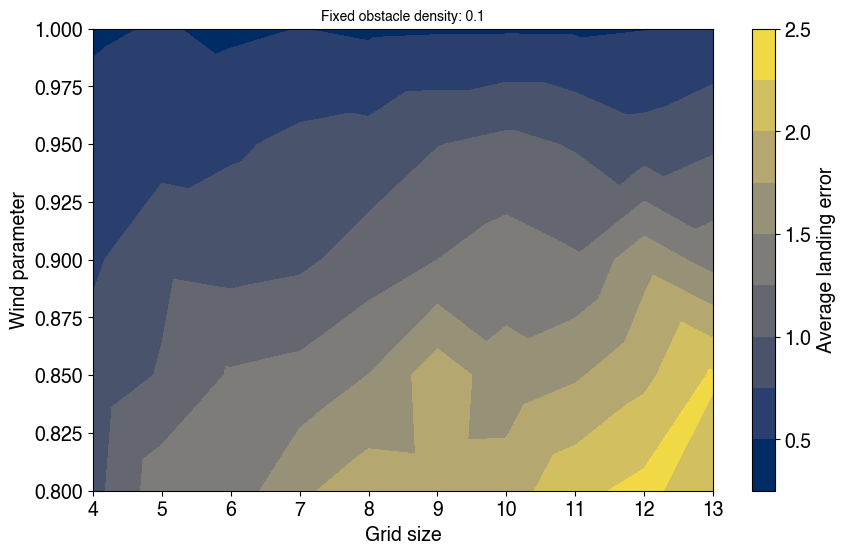

In [155]:
fig, ax = plt.subplots()

data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
data_ip = df_sim_ip.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()

# Input data
density = 0.1
method = 'ip'

norm_data_mc = data_mc.loc[:, density, :]['l1_norm']
norm_data_dp = data_dp.loc[:, density, :]['l1_norm']
norm_data_ip = data_ip.loc[:, density, :]['l1_norm']

# Get the x, y, z values
x = norm_data_mc.index.get_level_values('grid_size')
y = norm_data_mc.index.get_level_values('wind_param')
z_dp = norm_data_dp.values
z_mc = norm_data_mc.values
z_ip = norm_data_ip.values

# Create a triangulation for x and y axes
triang = tri.Triangulation(x, y)

# Create the contour plot
if method == 'dp':
    cntr = ax.tricontourf(triang, z_dp, cmap='viridis')
elif method == 'mc':
    cntr = ax.tricontourf(triang, z_mc, cmap='plasma')
elif method == 'ip':
    cntr = ax.tricontourf(triang, z_ip, cmap='cividis')

# Add a color bar
cbar = plt.colorbar(cntr, ax=ax)
cbar.ax.set_ylabel('Average landing error')
cbar.locator = MaxNLocator(5) # this number sets maximum number of colour bar ticks
# Set labels for the axes
ax.set_xlabel('Grid size')
ax.set_ylabel('Wind parameter')
ax.set_title(f'Fixed obstacle density: {density}')

plt.show()

### Contour (fixed grid size)

/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/176246918.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/176246918.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/176246918.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is 

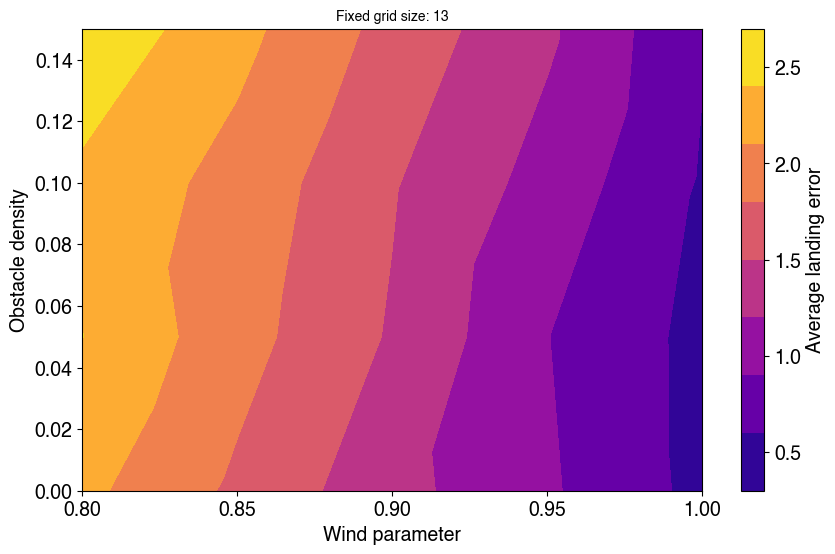

In [156]:
fig, ax = plt.subplots()

data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
data_ip = df_sim_ip.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()

# Input data
fixed_size = 13
method = 'mc'

norm_data_mc = data_mc.loc[fixed_size, :, :]['l1_norm']
norm_data_dp = data_dp.loc[fixed_size, :, :]['l1_norm']
norm_data_ip = data_ip.loc[fixed_size, :, :]['l1_norm']

# Get the x, y, z values
x = norm_data_mc.index.get_level_values('wind_param')
y = norm_data_mc.index.get_level_values('obstacle_density')
z_dp = norm_data_dp.values
z_mc = norm_data_mc.values
z_ip = norm_data_ip.values

# Create a triangulation for x and y axes
triang = tri.Triangulation(x, y)

# Create the contour plot
if method == 'dp':
    cntr = ax.tricontourf(triang, z_dp, cmap='viridis')
elif method == 'mc':
    cntr = ax.tricontourf(triang, z_mc, cmap='plasma')
elif method == 'ip':
    cntr = ax.tricontourf(triang, z_ip, cmap='cividis')

# Add a color bar
cbar = plt.colorbar(cntr, ax=ax)
cbar.ax.set_ylabel('Average landing error')
cbar.locator = MaxNLocator(5) # this number sets maximum number of colour bar ticks

# Set labels for the axes
ax.set_xlabel('Wind parameter')
ax.set_ylabel('Obstacle density')
ax.set_xticks(np.arange(0.8, 1.01, 0.05))
ax.set_title(f'Fixed grid size: {fixed_size}')

plt.show()

### Line (fixed environment size and obstacle density)

/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/164390989.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/164390989.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
/var/folders/7q/vfb4br_x0vnc613rxty89lnh0000gn/T/ipykernel_1452/164390989.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is 

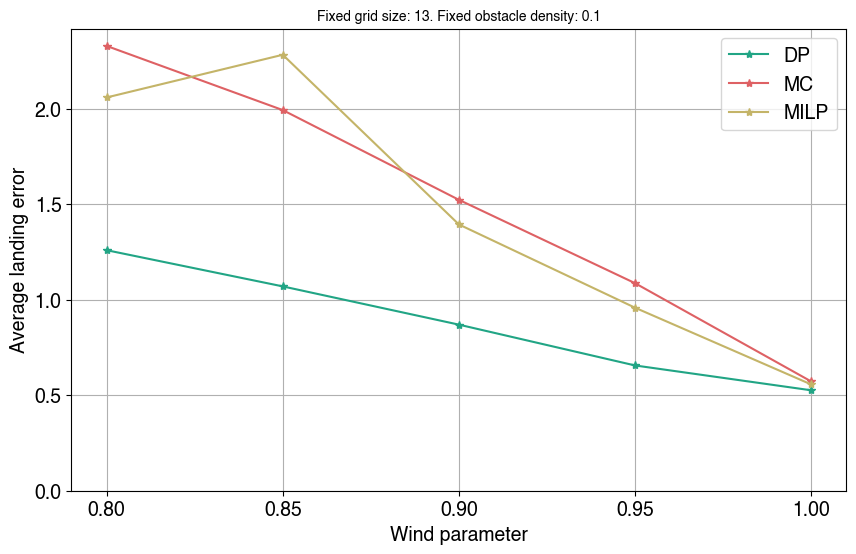

In [157]:
fig, ax = plt.subplots()

data_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean() # take mean values per benchmark MDP
data_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()
data_ip = df_sim_ip.groupby(['grid_size', 'obstacle_density', 'wind_param']).mean()


fixed_size = 13
fixed_density = 0.1
method = 'ip'
norm_data_mc = data_mc.loc[fixed_size, fixed_density, :]['l1_norm']
norm_data_dp = data_dp.loc[fixed_size, fixed_density, :]['l1_norm']
norm_data_ip = data_ip.loc[fixed_size, fixed_density, :]['l1_norm']
# Get the x, y, z values
x = norm_data_mc.index.get_level_values('wind_param')
y_dp = norm_data_dp.values
y_mc = norm_data_mc.values
y_ip = norm_data_ip.values
# Create the plot
cmap = plt.get_cmap('viridis')
ax.plot(x, y_dp, '-*', color=cmap.colors[150], label='DP')
cmap = plt.get_cmap('plasma')
ax.plot(x, y_mc, '-*', color=cmap.colors[150], label='MC')
cmap = plt.get_cmap('cividis')
ax.plot(x, y_ip, '-*', color=cmap.colors[200], label='MILP')

# Set labels for the axes
ax.set_xlabel('Wind parameter')
ax.set_ylabel('Average landing error')
ax.set_ylim(bottom=0)

ax.set_xticks(np.arange(0.8, 1.01, 0.05))
plt.grid(True)
plt.legend()
ax.set_title(f'Fixed grid size: {fixed_size}. Fixed obstacle density: {fixed_density}')

plt.show()

## Crash rates performance

### Surface (fixed wind parameter)

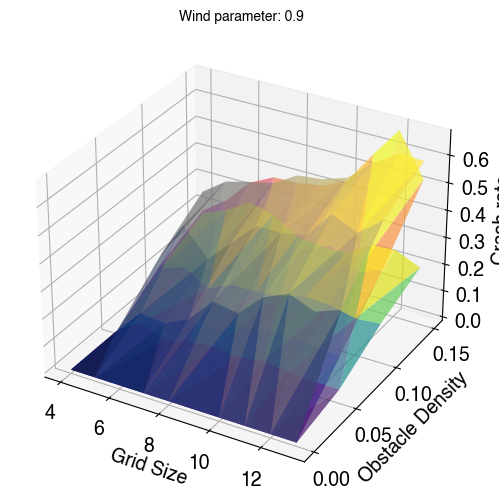

In [158]:
crash_rates_ip = df_sim_ip.groupby(['grid_size', 'obstacle_density', 'wind_param'])['l1_norm'].apply(lambda x: x.isna().sum() / len(x))
crash_rates_dp = df_sim_dp.groupby(['grid_size', 'obstacle_density', 'wind_param'])['l1_norm'].apply(lambda x: x.isna().sum() / len(x))
crash_rates_mc = df_sim_mc.groupby(['grid_size', 'obstacle_density', 'wind_param'])['l1_norm'].apply(lambda x: x.isna().sum() / len(x))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

wind_param_vals = [0.9]

for wp in wind_param_vals:

    # Get the x, y, z values
    z_mc = crash_rates_mc.loc[:, :, wp]
    z_dp = crash_rates_dp.loc[:, :, wp]
    z_ip = crash_rates_ip.loc[:, :, wp]
    
    x = z_mc.index.get_level_values('grid_size')
    y = z_mc.index.get_level_values('obstacle_density')

    # Plot the 3D surfaces
    ax.plot_trisurf(x, y, z_mc, cmap='plasma', alpha = 0.7)
    ax.plot_trisurf(x, y, z_dp, cmap='viridis', alpha = 0.7)
    ax.plot_trisurf(x, y, z_ip, cmap='cividis', alpha = 0.7)

    ax.set_title(f'Wind parameter: {wp}')

# Set labels for the axes
ax.set_xlabel('Grid Size')
ax.set_ylabel('Obstacle Density')
ax.set_zlabel('Crash rate')
ax.set_yticks(np.arange(0, 0.16, 0.05))

plt.show()

### Contours (fixed wind parameter)

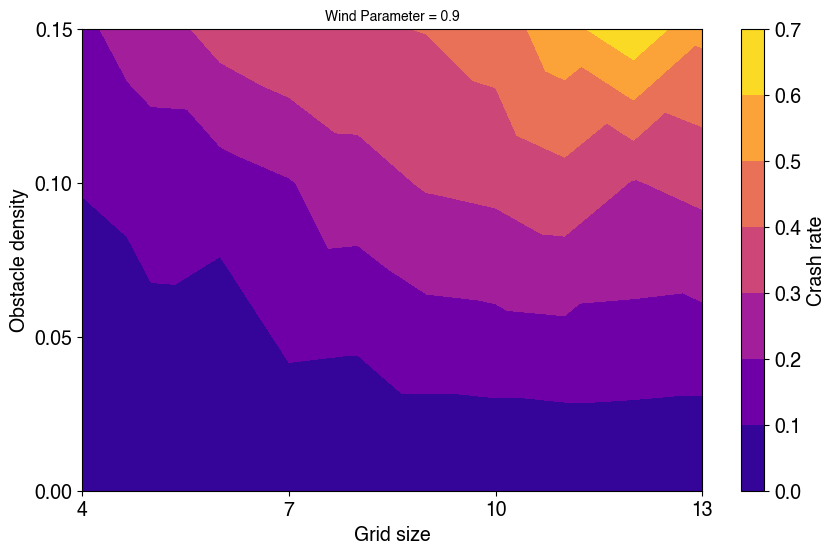

In [165]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

fig = plt.figure()

wind_param_vals = [0.9]
method = 'mc'

for i, wp in enumerate(wind_param_vals):
    ax = fig.add_subplot(len(wind_param_vals), 1, i+1)
    
    # Get the x, y, z values
    z_mc = crash_rates_mc.loc[:, :, wp]
    z_dp = crash_rates_dp.loc[:, :, wp]
    z_ip = crash_rates_ip.loc[:, :, wp]
    
    x = z_mc.index.get_level_values('grid_size')
    y = z_mc.index.get_level_values('obstacle_density')

    # Create a triangulation of the irregular grid
    triang = tri.Triangulation(x, y)

    # Plot the contour
    if method == 'mc':
        cs = ax.tricontourf(triang, z_mc, cmap='plasma')
    elif method == 'ip':
        cs = ax.tricontourf(triang, z_ip, cmap='cividis')
    elif method == 'dp':
        cs = ax.tricontourf(triang, z_dp, cmap='viridis')

    # Add a colorbar to show the scale of the values in the contours
    cbar = plt.colorbar(cs, ax=ax)

    # Set labels for the axes
    ax.set_xlabel('Grid size')
    ax.set_ylabel('Obstacle density')
    cbar.ax.set_ylabel('Crash rate')
    ax.set_yticks(np.arange(0, 0.16, 0.05))
    ax.set_xticks(np.arange(4, 14, 3))
    ax.set_title(f'Wind Parameter = {wp}')
    plt.grid(False)

plt.show()

### Contours (fixed grid size)

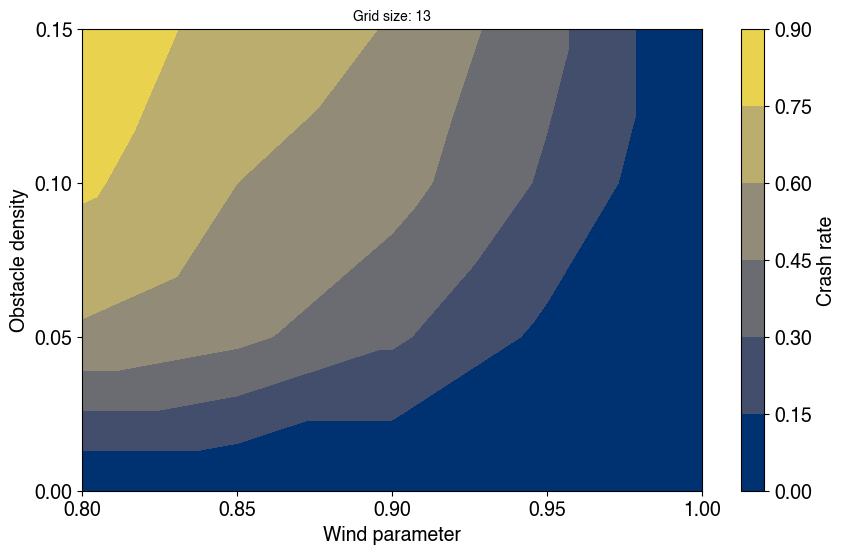

In [160]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

fig = plt.figure()

fixed_size = 13
method = 'ip'

ax = fig.add_subplot()
# Get the x, y, z values
z_mc = crash_rates_mc.loc[fixed_size, :, :]
z_dp = crash_rates_dp.loc[fixed_size, :, :]
z_ip = crash_rates_ip.loc[fixed_size, :, :]

x = z_mc.index.get_level_values('wind_param')
y = z_mc.index.get_level_values('obstacle_density')

# Create a triangulation of the irregular grid
triang = tri.Triangulation(x, y)

# Plot the contour
if method == 'mc':
    levels = np.linspace(0, 1, 10)
    cs = ax.tricontourf(triang, z_mc, cmap='plasma')
elif method == 'ip':
    levels = np.linspace(0, 1, 10)
    cs = ax.tricontourf(triang, z_ip, cmap='cividis')
elif method == 'dp':
    levels = np.linspace(0, 1, 10)
    cs = ax.tricontourf(triang, z_dp, cmap='viridis')

# Add a colorbar to show the scale of the values in the contours
cbar = plt.colorbar(cs, ax=ax)

# Set labels for the axes
ax.set_xlabel('Wind parameter')
ax.set_ylabel('Obstacle density')
cbar.ax.set_ylabel('Crash rate')
ax.set_yticks(np.arange(0, 0.16, 0.05))
ax.set_xticks(np.arange(0.8, 1.01, 0.05))
ax.set_title(f'Grid size: {fixed_size}')
plt.grid(False)

plt.show()

### Lines (fixed environment size and obstacle density)

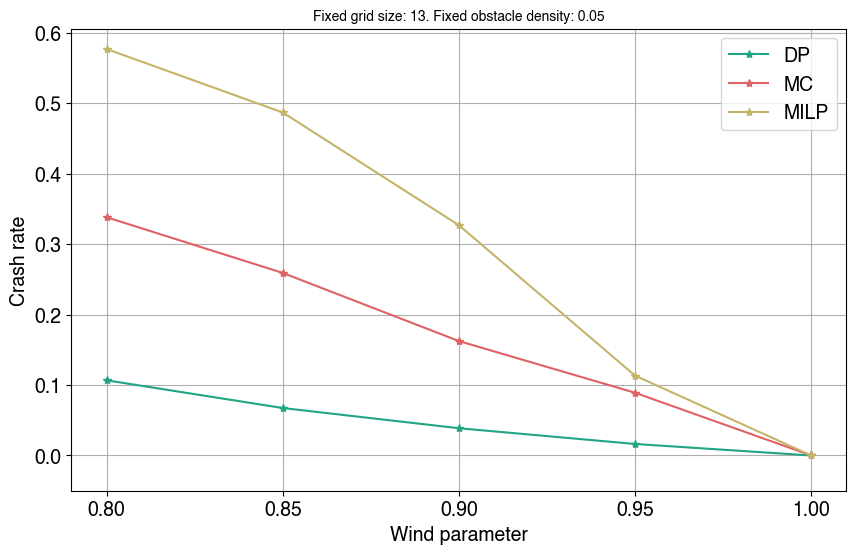

In [161]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

fig = plt.figure()

fixed_size = 13
fixed_density = 0.05

ax = fig.add_subplot()
# Get the x, y, z values
y_mc = crash_rates_mc.loc[fixed_size, fixed_density, :]
y_dp = crash_rates_dp.loc[fixed_size, fixed_density, :]
y_ip = crash_rates_ip.loc[fixed_size, fixed_density, :]

x = y_mc.index.get_level_values('wind_param')

# Create the plot
cmap = plt.get_cmap('viridis')
ax.plot(x, y_dp, '-*', color=cmap.colors[150], label='DP')

cmap = plt.get_cmap('plasma')
ax.plot(x, y_mc, '-*', color=cmap.colors[150], label='MC')

cmap = plt.get_cmap('cividis')
ax.plot(x, y_ip, '-*', color=cmap.colors[200], label='MILP')

# Set labels for the axes
ax.set_xlabel('Wind parameter')
ax.set_ylabel('Crash rate')
ax.set_ylim(bottom=-0.05)

ax.set_xticks(np.arange(0.8, 1.01, 0.05))

ax.set_title(f'Fixed grid size: {fixed_size}. Fixed obstacle density: {fixed_density}')

plt.grid(True)
plt.legend()

plt.show()

## MILP Solver Times

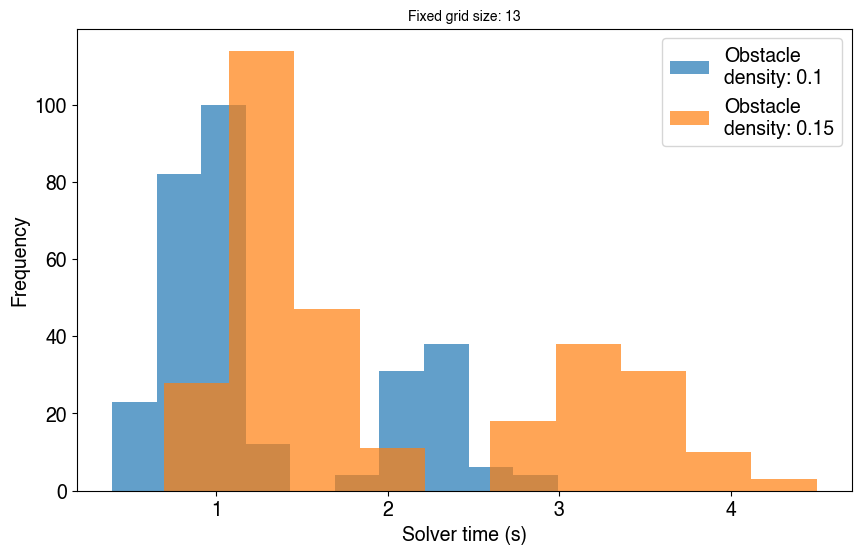

In [162]:
fixed_grid_size = 13
obstacle_densities = [0.1, 0.15]


fig, ax = plt.subplots()
ax.set_title(f'Fixed grid size: {fixed_grid_size}')
density_to_ID = {0:1, 0.05:2, 0.1:3, 0.15:4}
MDP_ID_one = int(str(fixed_grid_size) + str(density_to_ID[obstacle_densities[0]]))
MDP_ID_two = int(str(fixed_grid_size) + str(density_to_ID[obstacle_densities[1]]))

df_sim_ip[(df_sim_ip['MDP_ID'] == MDP_ID_one) & (df_sim_ip['wind_param'] == 1)]['solver_time'].hist(density=False, alpha=0.7, label=f'Obstacle\ndensity: {obstacle_densities[0]}')
df_sim_ip[(df_sim_ip['MDP_ID'] == MDP_ID_two) & (df_sim_ip['wind_param'] == 1)]['solver_time'].hist(density=False, alpha=0.7, label=f'Obstacle\ndensity: {obstacle_densities[1]}')

plt.xlabel('Solver time (s)')
plt.ylabel('Frequency')
plt.grid(False)
plt.legend()

plt.show()

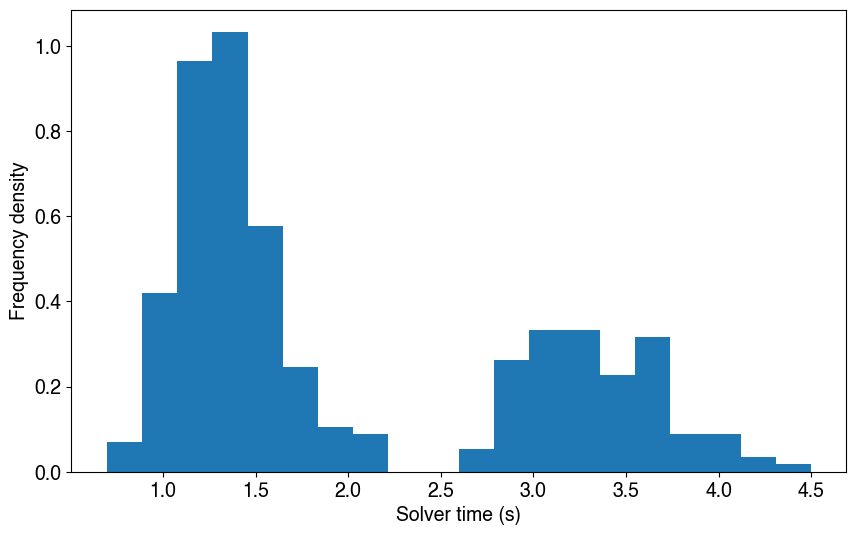

In [163]:
fig, ax = plt.subplots()

df_sim_ip[(df_sim_ip['MDP_ID'] == 134) & (df_sim_ip['wind_param'] == 1)]['solver_time'].hist(bins = 20, density=True)
plt.xlabel('Solver time (s)')
plt.ylabel('Frequency density')
plt.grid(False)

plt.show()

Below we plot ***mean or max*** solver times in problems with wind = 1, so we can get an idea of the trends of individual solution times.

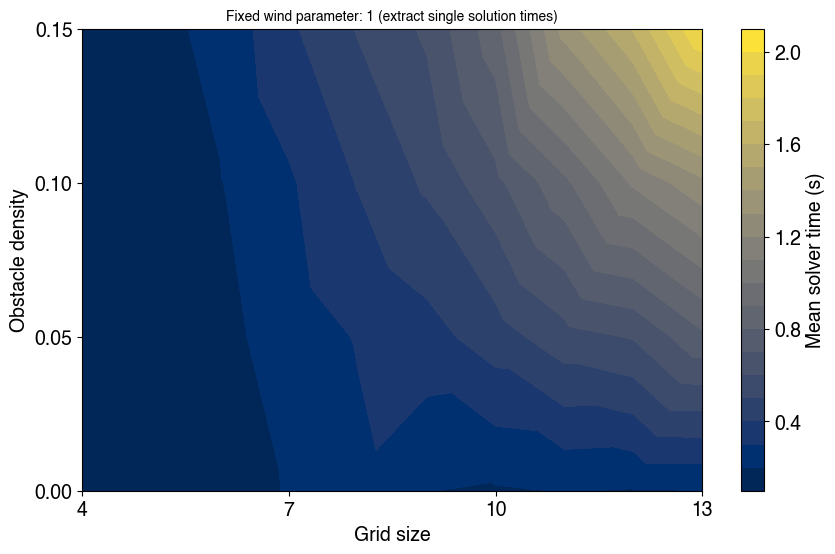

In [164]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title('Fixed wind parameter: 1 (extract single solution times)')


measure = 'mean' # can do MEAN, MAX, also median, other quantiles, etc.

if measure == 'mean':
    z_ip_time_envelopes = df_sim_ip[df_sim_ip['wind_param'] == 1].groupby(['grid_size', 'obstacle_density'])['solver_time'].mean()
elif measure == 'max':
    z_ip_time_envelopes = df_sim_ip[df_sim_ip['wind_param'] == 1].groupby(['grid_size', 'obstacle_density'])['solver_time'].max()
x = z_ip_time_envelopes.index.get_level_values('grid_size')
y = z_ip_time_envelopes.index.get_level_values('obstacle_density')

# Create a triangulation of the irregular grid
triang = tri.Triangulation(x, y)
# Plot the contour
cs = ax.tricontourf(triang, z_ip_time_envelopes, cmap='cividis', levels = 20)
# Add a colorbar to show the scale of the values in the contours
cbar = plt.colorbar(cs, ax=ax)
cbar.locator = MaxNLocator(6) # this number sets maximum number of colour bar ticks
# Set labels for the axes
ax.set_xlabel('Grid size')
ax.set_ylabel('Obstacle density')
if measure == 'mean':
    cbar.ax.set_ylabel(f'Mean solver time (s)')
elif measure == 'max':
    cbar.ax.set_ylabel(f'Max solver time (s)')
ax.set_yticks(np.arange(0, 0.16, 0.05))
ax.set_xticks(np.arange(4,14,3))
plt.grid(False)

plt.show()